# Comprehensive Data Cleaning of FIFA21 Player Attributes

![img](../images/logo.jpeg)

## 1.0 About Project

- Project: Data Cleaning of FIFA21 Dataset
- Author: Muhammad Waqas
- Author's Contact Info: 
    - **Email:** waqasliaqat630@gmailcom
    - [Linkedin](https://www.linkedin.com/in/muhammad-waqas-liaqat/)
    - [Github](https://github.com/waqas-liaqat)
    - [kaggle](https://www.kaggle.com/muhammadwaqas630)

## 2.0 About Data

`Data`: FIFA 21 messy, raw dataset for cleaning/ exploring

Dataset [link](https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring/data?select=fifa21_raw_data.csv)

## 3.0 Objective

- The objective of this project is to clean and preprocess the FIFA21 dataset, which was scraped from sofifa.com. The dataset contains messy and raw data, and the goal is to transform it into a clean, consistent, and analysis-ready format. This involves handling missing values, converting data types, cleaning text data, and ensuring overall data quality.

## 4.0 Import Libraries

- Let's Start the task by importing necessary libraries

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np
# For Data Visualization
import seaborn as sns
# For Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 5.0 Increase Readability of DataFrame

- As data have much features, we will increase readability of data for better understanding.

In [2]:
# To display rows and columns at maximum
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 6.0 Load Dataset

In [3]:
# Load Dataset
df_original=pd.read_csv("../data/raw/fifa21_raw_data.csv")

# Copy Dataset
df=df_original.copy()

## 7.0 Overview Of Dataset

- Having some understanding of data is necessary to know what should be done.

In [4]:
# First 5 Rows
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [5]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [6]:
# Summary Statistics
df.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,58.768007,42.697244,256.481848,55.587913,47.248116,42.392012,52.725012,58.528795,317.721007,64.357922,64.413088,63.367617,61.655619,63.926761,296.606618,57.802413,64.577006,62.654724,64.786132,46.786343,254.200379,55.590969,46.394067,50.299858,53.857158,48.058328,58.073608,139.908689,46.558828,47.705359,45.644502,81.436693,16.416197,16.207124,16.076558,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,14.518995,17.647116,78.652897,18.761660,18.208857,17.228069,15.177695,16.566286,55.881422,14.890208,14.638874,14.597144,9.072114,14.062703,50.733368,13.308980,11.844592,15.804986,12.488690,19.300862,64.596228,17.140038,20.697516,19.429171,13.708607,15.655890,12.079042,61.218624,20.138813,21.367322,20.922167,84.665579,17.554221,16.816305,16.491064,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.000000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,6

**Observation**:
- Height and Weight should be converted to integer.
- Joined date should be in Proper DateTime format.
- Wage,Release Clause, Value, Hits should be cleaned and be in integer format.
- SM,IR and W/F should get rid of star and be in proper best suggested DataType.
- Term and Contract should be separated and in proper format.

## 8.0 Data Cleaning

### 8.1 Missing Values

- Missing values can lead to biased or inaccurate analysis, making it essential to treat them to ensure data integrity and reliable results.

In [7]:
# Find Percentage of Null Values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head()

Loan Date End      94.662522
photoUrl            0.000000
GK Diving           0.000000
Sliding Tackle      0.000000
Standing Tackle     0.000000
dtype: float64

<Axes: >

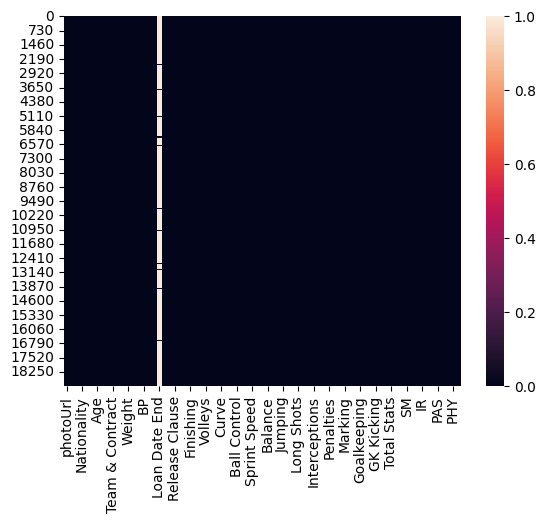

In [8]:
# Heatmap For Missing Values
sns.heatmap(df.isnull())

- As NULL Loan Date End values means player was not on Loan, So we will fill it with "Not Present".

In [9]:
df["Loan Date End"].fillna("Not Present",inplace=True)

### 8.2 Duplicates Treatment

- It is essential to treat duplicates to ensure data integrity and reliability and to avoid bias.

In [10]:
# Checking Number of Duplicates
df.duplicated().sum()

1

In [11]:
df[df.duplicated()]

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
944,https://cdn.sofifa.com/players/251/698/21_60.png,Kevin Berlaso,http://sofifa.com/player/251698/kevin-berlaso/...,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,251698,"5'8""",152lbs,Right,77,RB,0,"Jan 1, 2010",Not Present,€0,€0,€0,306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3 ★,4★,High,Medium,2 ★,78,56,69,77,72,68,\n12


In [12]:
df[df['LongName']=='Kevin Berlaso']

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
899,https://cdn.sofifa.com/players/251/698/21_60.png,Kevin Berlaso,http://sofifa.com/player/251698/kevin-berlaso/...,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,251698,"5'8""",152lbs,Right,77,RB,0,"Jan 1, 2010",Not Present,€0,€0,€0,306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3 ★,4★,High,Medium,2 ★,78,56,69,77,72,68,\n12
944,https://cdn.sofifa.com/players/251/698/21_60.png,Kevin Berlaso,http://sofifa.com/player/251698/kevin-berlaso/...,Ecuador,RB,K. Berlaso,32,77,77,\n Ecuador\nFree\n\n,251698,"5'8""",152lbs,Right,77,RB,0,"Jan 1, 2010",Not Present,€0,€0,€0,306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3 ★,4★,High,Medium,2 ★,78,56,69,77,72,68,\n12


In [13]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Checking Number of Duplicates
df.duplicated().sum()

0

- All Duplicates have been removed.

### 8.3 Inconsistencies Treatment

- Addressing data inconsistencies is essential for accurately understanding and analyzing all features within the dataset.

#### 8.3.1 Giving Height and Weight appropriate Data Types

In [15]:
# Head of Height and Weight
df[["Height","Weight"]].head()

,Height,Weight
0,"5'7""",159lbs
1,"6'2""",183lbs
2,"6'2""",192lbs
3,"5'11""",154lbs
4,"5'9""",150lbs


- **Weight**

In [16]:
# Removing lbs from Weight
df["Weight"]=df["Weight"].str.replace("lbs","")
# renaming weight
df.rename(columns={"Weight":"Weight(lbs)"},inplace=True)
# Changing datatpe of Weight to INT
df["Weight(lbs)"]=df["Weight(lbs)"].astype(int)

- **Height**

In [17]:
# Removing " from height string
df["Height"]=df["Height"].str.replace("\"","")
# Splitting Height into feet and inches
df[["Height in Feets","Height in Inches"]]=df["Height"].str.split("'",expand=True)
# Making height in integers
df["Height in Feets"]=df["Height in Feets"].astype(int)
df["Height in Inches"]=df["Height in Inches"].astype(int)
# Calculating total height in inches
df["Height in Inches"]=((df["Height in Feets"]*12)+df["Height in Inches"]).astype(int)
# Dropping rest of the two features
df.drop(columns=["Height","Height in Feets"],inplace=True)

In [18]:
# Information of Height and Weight
df[["Height in Inches","Weight(lbs)"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Height in Inches  18978 non-null  int32
 1   Weight(lbs)       18978 non-null  int32
dtypes: int32(2)
memory usage: 296.5 KB


#### 8.3.2 Converting joined date into datetime

- Having Datetime data in Proper Format is essential for analysis.

In [19]:
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2    Jul 16, 2014
3    Aug 30, 2015
4     Aug 3, 2017
Name: Joined, dtype: object

In [20]:
# Converting Joined o Datetime
df["Joined"]=pd.to_datetime(df["Joined"],format="%b %d, %Y")

In [21]:
df['Joined'].head()

0   2004-07-01
1   2018-07-10
2   2014-07-16
3   2015-08-30
4   2017-08-03
Name: Joined, dtype: datetime64[ns]

In [22]:
# Information of Joined
df["Joined"].info()

<class 'pandas.core.series.Series'>
Index: 18978 entries, 0 to 18978
Series name: Joined
Non-Null Count  Dtype         
--------------  -----         
18978 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 296.5 KB


#### 8.3.3 Converting Wage Feature to integer

In [23]:
df["Wage"].head()

0    €560K
1    €220K
2    €125K
3    €370K
4    €270K
Name: Wage, dtype: object

In [24]:
df["Wage"].isnull().sum()

0

In [25]:
# Removing €
df["Wage"]=df["Wage"].str.replace("€","")

In [26]:
# Total length of dataset
print(f"Total length of dataset is: {len(df)}")
having_k=df[df["Wage"].str.contains("K")].shape[0]
print(f"Number of rows having K is: {having_k}")
except_k=len(df)-having_k

Total length of dataset is: 18978
Number of rows having K is: 14824


In [27]:
# No Salary in Million Spotted
having_k=df[df["Wage"].str.contains("M")].shape[0]
having_k

0

In [28]:
# Gettig data not having k
without_k=df[~df["Wage"].str.contains("K")]
# checking if it is convertable to integer
without_k["Wage"]=without_k['Wage'].astype(int)

- As wages without K are completely convertable to integer, It means they are less than thousand.
- We will convert it to format of thousand.

In [29]:
# Removing data not having wages in k
df=df[df["Wage"].str.contains("K")]
df["Wage"]=df["Wage"].str.replace("K","")
df["Wage"]=df["Wage"].astype(float)
df["Wage"]=df["Wage"]*1000

In [30]:
# Combining Both
df=pd.concat([df,without_k],axis=0)
df["Wage"].sample(5)

17638     3000.0
7266       500.0
16169     4000.0
3236      3000.0
2197     11000.0
Name: Wage, dtype: float64

In [31]:
# Renaming Wages
df.rename(columns={"Wage":"Wage(€)"},inplace=True)
# Making wage to integer
df["Wage(€)"]=df["Wage(€)"].astype(float)

In [32]:
df["Wage(€)"].isnull().sum()

0

In [33]:
df["Wage(€)"].info()

<class 'pandas.core.series.Series'>
Index: 18978 entries, 0 to 18978
Series name: Wage(€)
Non-Null Count  Dtype  
--------------  -----  
18978 non-null  float64
dtypes: float64(1)
memory usage: 296.5 KB


#### 8.3.4 Converting Release Clause to integer

In [34]:
df["Release Clause"].head()

0    €138.4M
1     €75.9M
2    €159.4M
3      €161M
4    €166.5M
Name: Release Clause, dtype: object

In [35]:
# Removing €
df['Release Clause']=df["Release Clause"].str.replace('€','')
df['Release Clause'].head()

0    138.4M
1     75.9M
2    159.4M
3      161M
4    166.5M
Name: Release Clause, dtype: object

In [36]:
# Cecking if dataset have Release Clause in K
df[df["Release Clause"].str.contains("K")].head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Weight(lbs),foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage(€),Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height in Inches
2055,https://cdn.sofifa.com/players/156/433/21_60.png,Alfredo Talavera,http://sofifa.com/player/156433/alfredo-talave...,Mexico,GK,A. Talavera,37,74,74,\n\n\n\nU.N.A.M.\n2020 ~ 2021\n\n,156433,181,Right,74,GK,0,2020-07-03,Not Present,€575K,6000.0,978K,90,15,13,14,35,13,95,10,15,14,35,21,290,58,58,57,70,47,259,53,82,36,75,13,170,38,24,14,50,44,60,53,26,13,14,364,74,74,70,75,71,1321,422,4 ★,1★,Medium,Medium,2 ★,74,74,70,71,58,75,\n13,74
2293,https://cdn.sofifa.com/players/165/769/21_60.png,Cássio Albuquerque Anjos,http://sofifa.com/player/165769/cassio-albuque...,Brazil,GK,Cássio,39,74,74,\n\n\n\nAl Taawoun\n2018 ~ 2021\n\n,165769,174,Right,74,GK,0,2018-07-01,Not Present,€575K,10000.0,949K,73,11,11,12,25,14,81,12,12,13,22,22,237,34,40,45,73,45,226,51,70,30,64,11,159,40,22,13,60,24,59,49,18,17,14,362,76,74,68,69,75,1187,399,2 ★,1★,Medium,Medium,1 ★,76,74,68,75,37,69,\n1,73
2585,https://cdn.sofifa.com/players/107/298/21_60.png,Yohann Pelé,http://sofifa.com/player/107298/yohann-pele/21...,France,GK,Y. Pelé,37,73,73,\n\n\n\nOlympique de Marseille\n2015 ~ 2021\n\n,107298,196,Right,73,GK,0,2015-07-01,Not Present,€400K,14000.0,760K,90,15,14,16,34,11,93,13,14,15,33,18,232,37,40,33,70,52,230,50,67,32,72,9,99,33,24,15,14,13,59,39,14,13,12,357,71,74,67,72,73,1140,396,3 ★,1★,Medium,Medium,1 ★,71,74,67,73,39,72,\n11,77
2651,https://cdn.sofifa.com/players/049/472/21_60.png,Ludovic Butelle,http://sofifa.com/player/49472/ludovic-butelle...,France,GK,L. Butelle,37,73,73,\n\n\n\nAngers SCO\n2018 ~ 2021\n\n,49472,185,Left,73,GK,0,2018-01-04,Not Present,€400K,9000.0,800K,78,11,11,13,31,12,82,11,10,15,23,23,194,31,33,36,66,28,220,47,63,28,70,12,134,35,18,15,44,22,59,33,11,11,11,354,74,69,62,74,75,1095,386,3 ★,1★,Medium,Medium,2 ★,74,69,62,75,32,74,\n3,74
2768,https://cdn.sofifa.com/players/216/692/21_60.png,Sebastián Torrico,http://sofifa.com/player/216692/sebastian-torr...,Argentina,GK,S. Torrico,40,73,73,\n\n\n\nSan Lorenzo de Almagro\n2013 ~ 2021\n\n,216692,185,Right,73,GK,0,2013-04-25,Not Present,€400K,7000.0,600K,93,18,20,14,23,18,92,17,14,21,18,22,243,44,45,32,71,51,206,51,60,25,58,12,112,20,21,13,37,21,36,49,20,14,15,356,71,69,68,75,73,1151,401,2 ★,1★,Medium,Medium,1 ★,71,69,68,73,45,75,\n3,72


In [37]:
print(f"Total Length of dataset is: {len(df)}")
havingk=df["Release Clause"].str.contains("K").sum()
havingm=df["Release Clause"].str.contains("M").sum()
k_m=havingk+havingm
print(f"Number of rows having K and M is: {len(df)-k_m}")

Total Length of dataset is: 18978
Number of rows having K and M is: 1261


In [38]:
without_k_m=df[(~df["Release Clause"].str.contains("K")) & (~df["Release Clause"].str.contains("M"))]
without_k_m.head(3)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Weight(lbs),foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage(€),Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height in Inches
205,https://cdn.sofifa.com/players/173/731/21_60.png,Gareth Bale,http://sofifa.com/player/173731/gareth-bale/21...,Wales,RW,G. Bale,30,83,83,"\n\n\n\nTottenham Hotspur\nJun 30, 2021 On Loa...",173731,181,Left,83,RW,0,2013-09-01,"Jun 30, 2021",€24.5M,130000.0,0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3 ★,4★,Medium,Medium,4 ★,88,84,82,80,58,73,\n192,73
250,https://cdn.sofifa.com/players/200/888/21_60.png,Danilo Luís Hélio Pereira,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,CDM CM,Danilo Pereira,28,82,82,"\n\n\n\nParis Saint-Germain\nJun 30, 2021 On L...",200888,183,Right,82,CDM,0,2015-07-02,"Jun 30, 2021",€20M,92000.0,0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3 ★,3★,Medium,High,3 ★,66,63,72,73,80,85,\n122,74
257,https://cdn.sofifa.com/players/193/105/21_60.png,Alphonse Areola,http://sofifa.com/player/193105/alphonse-areol...,France,GK,A. Areola,27,82,86,"\n\n\n\nFulham\nJun 30, 2021 On Loan\n\n",193105,207,Right,82,GK,4,2010-07-01,"Jun 30, 2021",€20M,93000.0,0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3 ★,1★,Medium,Medium,2 ★,85,79,80,84,55,78,\n68,77


In [39]:
len(without_k_m[without_k_m["Release Clause"]=='0'])

1261

In [40]:
len(without_k_m)

1261

- It means Release Clause is in millions, thousands and zero.

- Currency Covertor function

In [41]:
#let's define a function
def currency_convertor_M(datat):
    if 'K' in datat:
        return float(datat.replace('K',''))*1000
    elif 'M' in datat:
        return float(datat.replace('M',''))*1000000
    else:
        return float(datat)

In [42]:
having_k=df["Release Clause"].str.contains("K").sum()
having_m=df["Release Clause"].str.contains("M").sum()
print(having_k+having_m)
nothavingmk=len(df["Release Clause"])-(having_k+having_m)

17717


In [43]:
df[(~df["Release Clause"].str.contains("K"))& (~df["Release Clause"].str.contains("M"))].head(3)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Weight(lbs),foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage(€),Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height in Inches
205,https://cdn.sofifa.com/players/173/731/21_60.png,Gareth Bale,http://sofifa.com/player/173731/gareth-bale/21...,Wales,RW,G. Bale,30,83,83,"\n\n\n\nTottenham Hotspur\nJun 30, 2021 On Loa...",173731,181,Left,83,RW,0,2013-09-01,"Jun 30, 2021",€24.5M,130000.0,0,417,87,81,84,80,85,419,80,90,87,79,83,397,86,89,78,79,65,405,90,82,69,77,87,362,65,59,83,79,76,85,161,54,55,52,52,15,15,11,5,6,2213,465,3 ★,4★,Medium,Medium,4 ★,88,84,82,80,58,73,\n192,73
250,https://cdn.sofifa.com/players/200/888/21_60.png,Danilo Luís Hélio Pereira,http://sofifa.com/player/200888/danilo-luis-he...,Portugal,CDM CM,Danilo Pereira,28,82,82,"\n\n\n\nParis Saint-Germain\nJun 30, 2021 On L...",200888,183,Right,82,CDM,0,2015-07-02,"Jun 30, 2021",€20M,92000.0,0,329,58,57,76,83,55,340,75,54,53,80,78,323,63,68,57,75,60,377,74,62,84,89,68,363,82,81,71,72,57,84,234,83,83,68,58,9,7,13,14,15,2024,439,3 ★,3★,Medium,High,3 ★,66,63,72,73,80,85,\n122,74
257,https://cdn.sofifa.com/players/193/105/21_60.png,Alphonse Areola,http://sofifa.com/player/193105/alphonse-areol...,France,GK,A. Areola,27,82,86,"\n\n\n\nFulham\nJun 30, 2021 On Loan\n\n",193105,207,Right,82,GK,4,2010-07-01,"Jun 30, 2021",€20M,93000.0,0,117,20,19,14,48,16,103,12,16,16,37,22,305,56,54,58,79,58,264,60,72,38,80,14,142,26,23,17,51,25,64,43,13,18,12,406,85,79,80,78,84,1380,461,3 ★,1★,Medium,Medium,2 ★,85,79,80,84,55,78,\n68,77


In [44]:
having_0=df["Release Clause"].str.contains("€0").sum()
print(having_0)
print(nothavingmk)

0
1261


- It means Release Clause is in millions, thousands and zero.

In [45]:
df['Release Clause']=df['Release Clause'].apply(currency_convertor_M)
# Renaming Release Clause
df.rename(columns={"Release Clause":"Release Clause(€)"},inplace=True)

In [46]:
df["Release Clause(€)"].head()

0    138400000.0
1     75900000.0
2    159400000.0
3    161000000.0
4    166500000.0
Name: Release Clause(€), dtype: float64

In [47]:
df["Release Clause(€)"].info()

<class 'pandas.core.series.Series'>
Index: 18978 entries, 0 to 18978
Series name: Release Clause(€)
Non-Null Count  Dtype  
--------------  -----  
18978 non-null  float64
dtypes: float64(1)
memory usage: 296.5 KB


#### 8.3.5 Converting Hits to Integer

In [48]:
df["Hits"].isnull().sum()

0

In [49]:
df["Hits"].sample(5)

11273     \n39
7389      \n13
4984     \n168
6955       \n4
8773       \n2
Name: Hits, dtype: object

In [50]:
df["Hits"] = df["Hits"].astype(str).str.replace("\n", "")

In [51]:
df['Hits'].sample(5)

11144    2
7943     6
12379    4
17629    1
13652    2
Name: Hits, dtype: object

In [52]:
print(df["Hits"].str.contains("K").sum())

15


In [53]:
df.loc[df["Hits"].str.contains("K", na=False), "Hits"] = (
    df["Hits"].str.replace("K", "", regex=True).astype(float) * 1000
)

In [54]:
df["Hits"].info()

<class 'pandas.core.series.Series'>
Index: 18978 entries, 0 to 18978
Series name: Hits
Non-Null Count  Dtype 
--------------  ----- 
18978 non-null  object
dtypes: object(1)
memory usage: 812.6+ KB


#### 8.3.6 Value

In [55]:
df["Value"].isnull().sum()

0

In [56]:
df["Value"].head()

0    €67.5M
1      €46M
2      €75M
3      €87M
4      €90M
Name: Value, dtype: object

In [57]:
df["Value"]=df["Value"].str.replace("€","")
df["Value"]=df["Value"].apply(currency_convertor_M)
df.rename(columns={"Value":"Value(€)"},inplace=True)

#### 8.3.7 Team & Contract Feature

In [58]:
# sneak peak
df["Team & Contract"].head()

0           \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1               \n\n\n\nJuventus\n2018 ~ 2022\n\n
2        \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3        \n\n\n\nManchester City\n2015 ~ 2023\n\n
4    \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
Name: Team & Contract, dtype: object

In [59]:
df["Team & Contract"]=df["Team & Contract"].str.replace("\n\n\n\n","").str.replace("\n\n","")
df["Team & Contract"].head()

0           FC Barcelona\n2004 ~ 2021
1               Juventus\n2018 ~ 2022
2        Atlético Madrid\n2014 ~ 2023
3        Manchester City\n2015 ~ 2023
4    Paris Saint-Germain\n2017 ~ 2022
Name: Team & Contract, dtype: object

In [60]:
with_multiple_n=len(df[df["Team & Contract"].str.count("\n")>1])
print(f"Number of entries with Multiple n\ {with_multiple_n}")
with_multiple_n=len(df[df["Team & Contract"].str.count("\n")==2])
print(f"Number of entries with two n\{with_multiple_n}")

Number of entries with Multiple n\ 237
Number of entries with two n\237


In [61]:
df[df["Team & Contract"].str.count("\n")>1]["Team & Contract"].sample(3)

1307    \n Paraguay\nFree
4993     \n Iceland\nFree
1579     \n Ecuador\nFree
Name: Team & Contract, dtype: object

- After Watching a lot of Samples wih multiple \n, we can assume that extra \n is present at start.
- So we will remove first \n of these.
- If it is not True, it will generate error while typecasting.

In [62]:
# Removing \n of only those points having multiple \n
df.loc[df["Team & Contract"].str.count("\n")>1, "Team & Contract"] = df["Team & Contract"].str.replace("\n","",n=1)
# Splitting Team and Contract
df[["Team","Contract"]] = df["Team & Contract"].str.split("\n", expand=True)

- As anticipated, our analysis aligns with our expectations😉.

In [63]:
# Dropping Team and Contract
df.drop(columns=["Team & Contract"],inplace=True)

#### 8.3.8 SM and W/F and IR

- Just by removing ★, we can have pure integer format data.

In [64]:
# Removing ★ from SM and W/F and IR
df["SM"]=df["SM"].str.replace("★","")
df["W/F"]=df["W/F"].str.replace(" ★","")
df["IR"]=df["IR"].str.replace("★","")

In [65]:
# Converting SM and W/F and IR to Integer
df["SM"]=df["SM"].astype(int)
df["W/F"]=df["W/F"].astype(int)
df["IR"]=df["IR"].astype(int)

In [66]:
df[["SM", "W/F", "IR"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SM      18978 non-null  int32
 1   W/F     18978 non-null  int32
 2   IR      18978 non-null  int32
dtypes: int32(3)
memory usage: 886.7 KB


- 🎉Fantastic! Data cleaning is now finished. Time to validate and verify our work.

## 09 Validation and Verification

### 9.1 Checking Data Types of Updated Features

In [67]:
# Checking Datatypes
df.dtypes

photoUrl                     object
LongName                     object
playerUrl                    object
Nationality                  object
Positions                    object
Name                         object
Age                           int64
↓OVA                          int64
POT                           int64
ID                            int64
Weight(lbs)                   int32
foot                         object
BOV                           int64
BP                           object
Growth                        int64
Joined               datetime64[ns]
Loan Date End                object
Value(€)                    float64
Wage(€)                     float64
Release Clause(€)           float64
Attacking                     int64
Crossing                      int64
Finishing                     int64
Heading Accuracy              int64
Short Passing                 int64
Volleys                       int64
Skill                         int64
Dribbling                   

### 9.2 Checking for Missing Values of Updated Features

In [68]:
# Find Percentage of Null Values
df.isnull().sum().sort_values(ascending=False).head()

photoUrl          0
Penalties         0
GK Diving         0
Goalkeeping       0
Sliding Tackle    0
dtype: int64

### 9.3 Information about dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18978 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   photoUrl           18978 non-null  object        
 1   LongName           18978 non-null  object        
 2   playerUrl          18978 non-null  object        
 3   Nationality        18978 non-null  object        
 4   Positions          18978 non-null  object        
 5   Name               18978 non-null  object        
 6   Age                18978 non-null  int64         
 7   ↓OVA               18978 non-null  int64         
 8   POT                18978 non-null  int64         
 9   ID                 18978 non-null  int64         
 10  Weight(lbs)        18978 non-null  int32         
 11  foot               18978 non-null  object        
 12  BOV                18978 non-null  int64         
 13  BP                 18978 non-null  object        
 14  Growth     

### 9.4 Sneaking Peek of Cleaed Data

In [70]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,ID,Weight(lbs),foot,BOV,BP,Growth,Joined,Loan Date End,Value(€),Wage(€),Release Clause(€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Height in Inches,Team,Contract
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,158023,159,Left,93,RW,0,2004-07-01,Not Present,67500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,372,67,FC Barcelona,2004 ~ 2021
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,183,Right,92,ST,0,2018-07-10,Not Present,46000000.0,220000.0,75900000.0,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,344,74,Juventus,2018 ~ 2022
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,200389,192,Right,91,GK,2,2014-07-16,Not Present,75000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,86,74,Atlético Madrid,2014 ~ 2023
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,154,Right,91,CAM,0,2015-08-30,Not Present,87000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,163,71,Manchester City,2015 ~ 2023
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,190871,150,Right,91,LW,0,2017-08-03,Not Present,90000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,273,69,Paris Saint-Germain,2017 ~ 2022


### 9.5 Saving Cleaned Data

In [71]:
#df.to_csv("../data/processed/fifa21_clean_data.csv",index=False)

## 10 Conclusion / Summary

In this data cleaning project, I performed several key transformations to ensure that the FIFA21 dataset is clean, consistent, and ready for analysis:

Height and Weight Conversion:

The Height column was converted to inches after removing extra commas and performing necessary calculations.
The Weight column was converted to an integer by removing the "lbs" suffix from the string values.
Monetary Values Transformation:

The Wage, Release Clause, Hits, and Value columns were converted to integers by removing the pound sign (£) and appropriately multiplying the values by 1,000 or 1,000,000 to account for 'k' and 'm' suffixes.
Date Conversion:

The Joined column was typecasted to a datetime format to standardize and facilitate date-related analyses.
Feature Splitting:

The Team and Contract column was split into two separate features: Team and Contract, providing clearer insights into the player's affiliations.
Star Ratings Conversion:

The columns SM (Skill Moves), W/F (Weak Foot), and IR (Injury Rating) were converted to integers by removing star symbols.
These transformations were validated through various checks to ensure data integrity and consistency, resulting in a dataset that is well-prepared for subsequent analysis or modeling.